In [230]:
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(1)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [231]:
# Creating the artificial dataset
class Data2d(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.zeros(20,2)
        self.x[:,0] = torch.arange(-1,1,0.1)
        self.x[:,1] = torch.arange(-0.1,0.1,0.01)
        
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b
        
        self.y = self.f + 0.1*torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]
    
    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    # Getting the length
    def __len__(self):
        return self.len
# Instantiation of the class  
my_data = Data2d()

In [232]:
# Defining a function for plotting the plane
def plane2D(model,dataset,n=0):
      
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()
    
    x1 = dataset.x[:,0].view(-1,1).numpy()
    x2 = dataset.x[:,1].view(-1,1).numpy()
    y = dataset.y.numpy()
    X,Y = np.meshgrid(np.arange(x1.min(),x1.max(),0.05),np.arange(x2.min(), x2.max(), 0.05))
    
    yhat = w1*X + w2*Y + b
    
    # plotting
    fig = plt.figure()
    ax = fig.gca(projection = '3d')
    
    ax.plot(x1[:,0], x2[:,0], y[:,0], 'ro', label = 'y')
    ax.plot_surface(X,Y,yhat)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.legend()
    plt.title('Estimated plane iteration: '+ str(n))
    plt.show()

In [233]:
# Creating a linear regression model
class lin_reg(nn.Module):

    def __init__(self, in_feat, out_feat):
        super(lin_reg, self).__init__()
        self.linear = nn.Linear(in_feat, out_feat)
        
    def forward(self,x):
        yhat = self.linear(x)
        return yhat
    
# Instantiation of an object
model = lin_reg(2,1)
print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[ 0.6209, -0.1178]])), ('linear.bias', tensor([0.3026]))])


Before training:


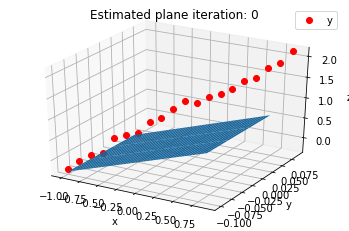

After training: 


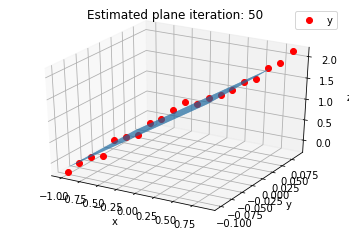

In [234]:
# Parameters
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01) 
# Training data object which loads the artificial data
trainloader = DataLoader(dataset = my_data, batch_size = 2)
# Training the model
Loss = []  # variable for storing losses after each epoch
epochs = 50
print('Before training:')
plane2D(model, my_data)
def train_model(epochs):
    for epoch in range(epochs):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat,y)
            Loss.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
# Calling the training function          
train_model(epochs)
print("After training: ")
plane2D(model, my_data, epochs)

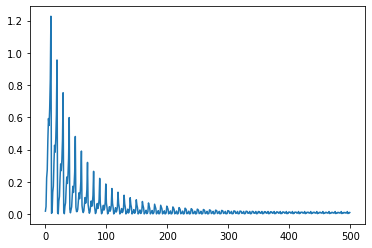

In [235]:
plt.plot(Loss)

In [236]:
for x,y in trainloader:
        yhat = model(x)
        print('x: ',x.data)
        print('yhat: ',yhat.data)

x:  tensor([[-1.0000, -0.1000],
        [-0.9000, -0.0900]])
yhat:  tensor([[-0.1349],
        [-0.0211]])
x:  tensor([[-0.8000, -0.0800],
        [-0.7000, -0.0700]])
yhat:  tensor([[0.0926],
        [0.2064]])
x:  tensor([[-0.6000, -0.0600],
        [-0.5000, -0.0500]])
yhat:  tensor([[0.3201],
        [0.4339]])
x:  tensor([[-0.4000, -0.0400],
        [-0.3000, -0.0300]])
yhat:  tensor([[0.5476],
        [0.6614]])
x:  tensor([[-0.2000, -0.0200],
        [-0.1000, -0.0100]])
yhat:  tensor([[0.7751],
        [0.8889]])
x:  tensor([[0.0000, 0.0000],
        [0.1000, 0.0100]])
yhat:  tensor([[1.0026],
        [1.1164]])
x:  tensor([[0.2000, 0.0200],
        [0.3000, 0.0300]])
yhat:  tensor([[1.2301],
        [1.3439]])
x:  tensor([[0.4000, 0.0400],
        [0.5000, 0.0500]])
yhat:  tensor([[1.4576],
        [1.5714]])
x:  tensor([[0.6000, 0.0600],
        [0.7000, 0.0700]])
yhat:  tensor([[1.6851],
        [1.7988]])
x:  tensor([[0.8000, 0.0800],
        [0.9000, 0.0900]])
yhat:  tenso